In [109]:
___Author___='LumberJack Jyss'

In [110]:
print('LumberJack BRUTAL AtidotCom TREND FORECAST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND FORECAST
LumberJack Jyss (c)


In [111]:
print('Importation des librairies...')
import yahoofinancials
from yahoofinancials import YahooFinancials
import statistics
import pickle
import talib
import time
from datetime import date,datetime
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [112]:
labasequoi =  pd.read_csv('simanim.csv')

In [113]:
simanim = labasequoi

In [114]:
simanim['trend'].shift(-1)
simanim = simanim.dropna()

In [115]:
simanim.set_index('Local time', inplace=True)

In [116]:
simanim = simanim.drop((['return_1','return_2','return_3','return_4','return_5']),axis=1)

In [117]:
#delta = round((date(simanim.index[simanim.shape[0]-1].year,\
 #                   simanim.index[simanim.shape[0]-1].month,simanim.index[simanim.shape[0]-1].day)\
  #             -date(simanim.index[0].year,simanim.index[0].month,simanim.index[0].day)).days)
delta = simanim.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  9988
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  7990  jours 
Bloc 2 : 1998  jours


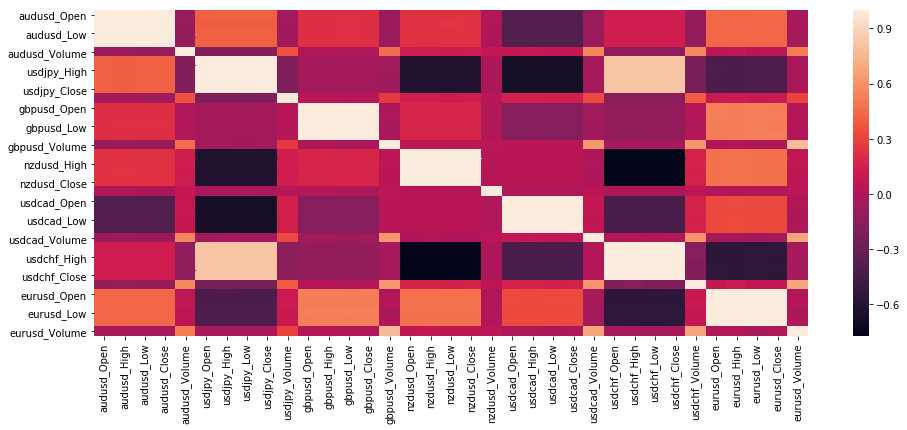

In [118]:
plt.figure(figsize=(16,6))
sns.heatmap(simanim.iloc[:,:-1].corr())
plt.show()

In [119]:
# SPLIT TRAIN ET TEST
X = simanim.iloc[:,:-1]
y = simanim.iloc[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X.iloc[:bloc1,:]
X_test = X.iloc[bloc1:,:]
y_train = y.iloc[:bloc1]
y_test = y.iloc[bloc1:]

In [120]:
import statsmodels.api as sm
logit_model=sm.Logit(y.values,X.values)
result=logit_model.fit(
    start_params=None,
    method='bfgs',
    maxiter=350,
    full_output=True,
    retall=True,
    disp=1,
    callback=None,
    missing='drop'
)
print(result.summary2())

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: o

Optimization terminated successfully.
         Current function value: 0.387029
         Iterations: 297
         Function evaluations: 327
         Gradient evaluations: 319
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.144      
Dependent Variable: y                AIC:              7801.2874  
Date:               2019-04-15 20:59 BIC:              8053.6073  
No. Observations:   9988             Log-Likelihood:   -3865.6    
Df Model:           34               LL-Null:          -4515.2    
Df Residuals:       9953             LLR p-value:      3.9381e-251
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|     [0.025      0.975] 
-------------------------------------------------------------------
x1       127.7265  661.2371   0.1932  0.8468  -1168.2745  1423.7274
x2        55.1582  817.8563   0.0674  0.946

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [121]:
classifier = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.001,
    C=1,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='newton-cg',
    max_iter=1000,
    multi_class='ovr',
    verbose=1,
    warm_start=False,
    n_jobs=-1,
)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.001,
          verbose=1, warm_start=False)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1737    8]
 [ 241   12]]


In [124]:
print('Accuracy de la regression logistique sue le test set: {:.2f}%'.format(classifier.score(X_test, y_test)*100))

Accuracy de la regression logistique sue le test set: 87.54%


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1745
         1.0       0.60      0.05      0.09       253

   micro avg       0.88      0.88      0.88      1998
   macro avg       0.74      0.52      0.51      1998
weighted avg       0.84      0.88      0.83      1998



In [126]:
np.unique(y_pred, return_counts=True)

(array([ 0.,  1.]), array([1978,   20]))

In [127]:
backtest = simanim[['eurusd_Close','trend']]
backtest.index = simanim.index

In [128]:
backtest.iloc[10,1]

0.0

In [129]:
equity = 100000
pos = 0
nb_transactions = 0
backtest_graph = pd.DataFrame()
col_equity = [100000]
col_open_pos = [0]
col_close_pos = [0]
col_is_win = [0]
col_profit = [0]
col_cours = [0]
max_gross = (0,0)
max_loss = (0,0)
trend = backtest.iloc[i,1]

for i in range (backtest.shape[0]-6):
    
    jour_0 = backtest.iloc[i,0]
    jour_1 = backtest.iloc[i+1,0]
    jour_2 = backtest.iloc[i+2,0]
    jour_3 = backtest.iloc[i+3,0]
    jour_4 = backtest.iloc[i+4,0]
    jour_5 = backtest.iloc[i+5,0]
    trend = backtest.iloc[i,1]
    
    pip_1 = (jour_1-jour_0)
    pip_2 = (jour_2-jour_0)
    pip_3 = (jour_3-jour_0)
    pip_4 = (jour_4-jour_0)
    pip_5 = (jour_5-jour_0)
    
    
    
    
    if trend == 0:
        pass
    else:
        
        if trend == 1 and pos ==0 :
            nb_transactions+=1
            price_buy = jour_0
            pos = 1
            col_open_pos.append(1)
            equity = equity - 1.5 
            #col_cours.append(price_buy)
            #print('\033[94m \n',backtest.index[i])
            #print("\033[94m Ouverture de position de $100,000")
            #print("\033[94m Prix d'achat =$",price_buy)
            
            
            if pip_1 > 0.001 and pos == 1 or pip_1 < -0.001 and backtest.iloc[i,1]==0: 
                price_sell  = jour_1
                pos = 0
                nb_transactions+=1
                equity = equity - 1.5 + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_1 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\n\033[92m \n',backtest.index[i+1])
                #print("\033[92m Cloture de position")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 1 minute : ',(price_sell-price_buy)*100000)
            elif pip_2 > 0.001 and pos == 1 or pip_2 < -0.001 and backtest.iloc[i,1]==0: 
                price_sell  = jour_2
                pos = 0
                nb_transactions+=1
                equity = equity - 1.5 + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_2 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+2])
                #print("\033[92m Vente")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 2 minutes ',(price_sell-price_buy)*100000)
            elif pip_3 > 0.001 and pos == 1 or pip_3 < -0.001  and backtest.iloc[i,1]==0: 
                price_sell  = jour_3
                pos = 0
                nb_transactions+=1
                equity = equity - 1.5 + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_3 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+3])
                #print("\033[92m Vente")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 3 minutes ',(price_sell-price_buy)*100000)
            elif pip_4 > 0.001 and pos == 1 or pip_4 < -0.001 and backtest.iloc[i,1]==0: 
                price_sell  = jour_4
                pos = 0
                nb_transactions+=1
                equity = equity - 1.5 + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_4 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+4])
                #print("\033[92m Vente")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 4 minutes ',(price_sell-price_buy)*100000)
            else : 
                price_sell  = jour_5
                pos = 0
                nb_transactions+=1
                equity = equity - 1.5 + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_5 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+5])
                #print("\033[92m Prix de cloture = $",price_sell)
                #print("\033[92m Nouvelle balance equity = $ \033[4m",equity)
                #print('pnl en 5 minutes ',(price_sell-price_buy)*100000)
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transactions,' transactions.' )


  Les gains faramineux s'élèvent à : $ -1000.0 !. En  3348  transactions.


In [130]:
gross_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gross_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [131]:
backtest_graph['equity'] = col_equity
backtest_graph['col_profit'] = col_profit
backtest_graph['col_is_win'] = col_is_win
backtest_graph['col_cours'] = col_cours

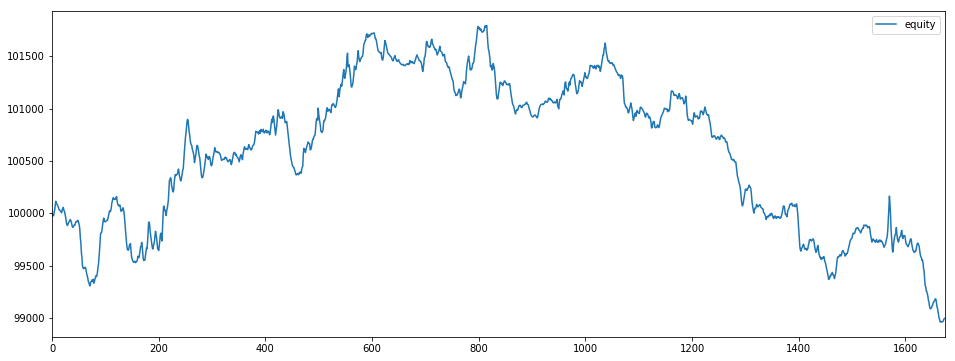

In [132]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot()
plt.legend()

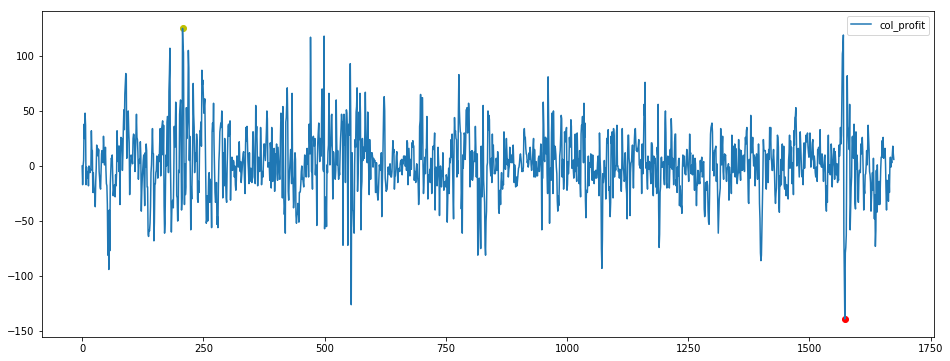

In [133]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gross[0],max_gross[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [134]:
print('Transaction à $100,000')
print('Gain généré',equity-100000)
print('Nombre de transactions : ',nb_transactions)
print('Nombre de positions ouvertes',sum(col_open_pos))
print('Nombre de positions fermées',sum(col_close_pos))
print('Nombre de positions gagnées',sum(col_is_win))
print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',max(col_profit),' ',max_gross[1])
print('Perte maximale',min(col_profit),' ',max_loss[1])
print('Moyenne du gain',statistics.mean(col_profit))
print('Somme de tous les gains',gross_sum)
print('Somme de tous le loss',abs(loss_sum))
print('profit factor',abs(gross_sum/loss_sum))


Transaction à $100,000
Gain généré -1000.0
Nombre de transactions :  3348
Nombre de positions ouvertes 1674
Nombre de positions fermées 1674
Nombre de positions gagnées 880
Nombre de positions perdues 794
Gain maximal 125.0   125.0
Perte maximale -139.0   -139.0
Moyenne du gain 2.40119402985
Somme de tous les gains 19161.0
Somme de tous le loss 15139.0
profit factor 1.26567144461


In [56]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logit_model, open(filename, 'wb'))

129600

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)